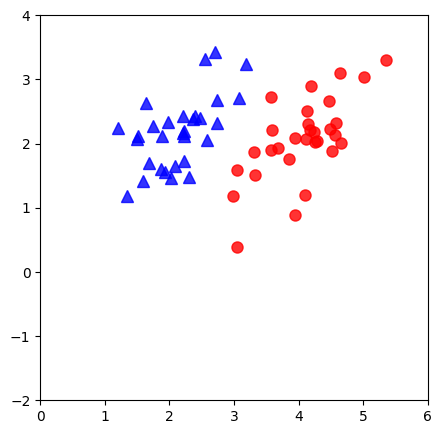

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2)
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 30
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T
X = np.concatenate((X0, X1), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)

# Xbar
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)

fig, ax = plt.subplots(figsize=(5, 5))
ani = plt.cla()
#plot points
ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 8, alpha = .8)
ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8)
ani = plt.axis([0 , 6, -2, 4])
plt.show()

In [2]:
# Define h_w(x):= W^T.x + w_0 = \bar{W}^T . \bar{x}
def h(w, x):
    return np.sign(np.dot(w.T, x))

#Stop condition
def has_converged(X, y, w):
    return np.array_equal(h(w, X), y) #True if h(w, X) == y else False

def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    mis_points = [] # set of miss position points
    
    while True:
        # mix data
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(3, 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi*xi
                
                w.append(w_new)
                
        if has_converged(X, y, w[-1]):
            break
    return (w, mis_points)

d = X.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X, y, w_init)
print(w[-1])


def draw_line(w):
    w0, w1, w2 = w[0], w[1], w[2]
    if w2 != 0:
        x11, x12 = -100, 100
        return plt.plot([x11, x12], [-(w1*x11 + w0)/w2, -(w1*x12 + w0)/w2], 'k')
    else:
        x10 = -w0/w1
        return plt.plot([x10, x10], [-100, 100], 'k')

[[ 13.97858527]
 [-15.02901929]
 [ 14.38743059]]


MovieWriter imagemagick unavailable; using Pillow instead.


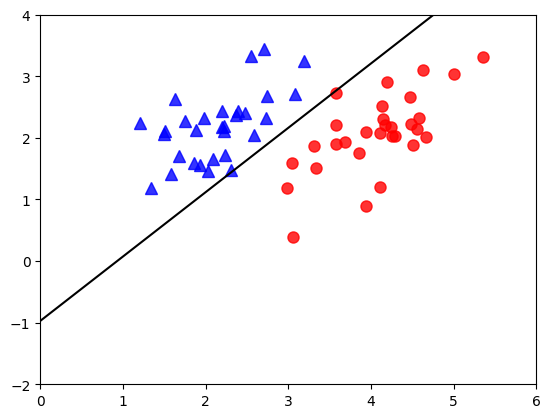

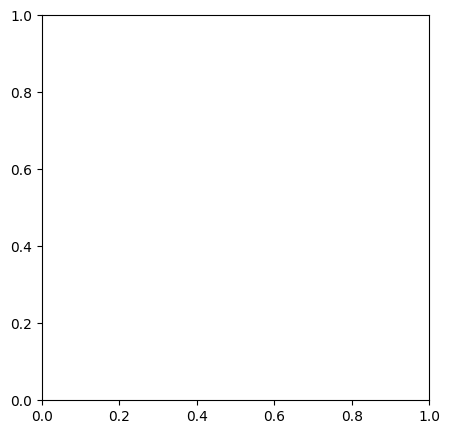

In [4]:
## Visualization
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

it = len(w)

def viz_alg_1d_2(w):
    fig, ax = plt.subplots(figsize=(5, 5))


def update(i):
    ani = plt.cla()
    #points
    ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 8, alpha = .8)
    ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8)
    ani = plt.axis([0 , 6, -2, 4])
    i2 = i if i < it else it-1
    ani = draw_line(w[i2])
    if i < it-1:
        # draw one misclassified point
        circle = plt.Circle((X[1, m[i]], X[2, m[i]]), 0.15, color='k', fill = False)
        ax.add_artist(circle)
    # hide axis
    # cur_axes = plt.gca()
    # cur_axes.axes.get_xaxis().set_ticks([])
    # cur_axes.axes.get_yaxis().set_ticks([])
    
    label = 'PLA: iter %d/%d' %(i2, it-1)
    ax.set_xlabel(label)
    return ani, ax


anim = FuncAnimation(fig, update, frames=np.arange(0, it + 2), interval=100)
# save
anim.save('MLP_synthetic_example.png', dpi = 100, writer = 'imagemagick')

viz_alg_1d_2(w)